![gym](gym.png)


You are a product manager for a fitness studio and are interested in understanding the current demand for digital fitness classes. You plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

In [112]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
# Start coding here
df = pd.read_csv('data/workout.csv')
df.head()

,month,workout_worldwide
0,2018-03,59
1,2018-04,61
2,2018-05,57
3,2018-06,56
4,2018-07,51


In [114]:
# add new column to store year
df['year'] = (df['month'].str[:4]).astype(int)
year_str = df.groupby('year')['workout_worldwide'].sum().sort_values(ascending = False).idxmax()
year_str = str(year_str)

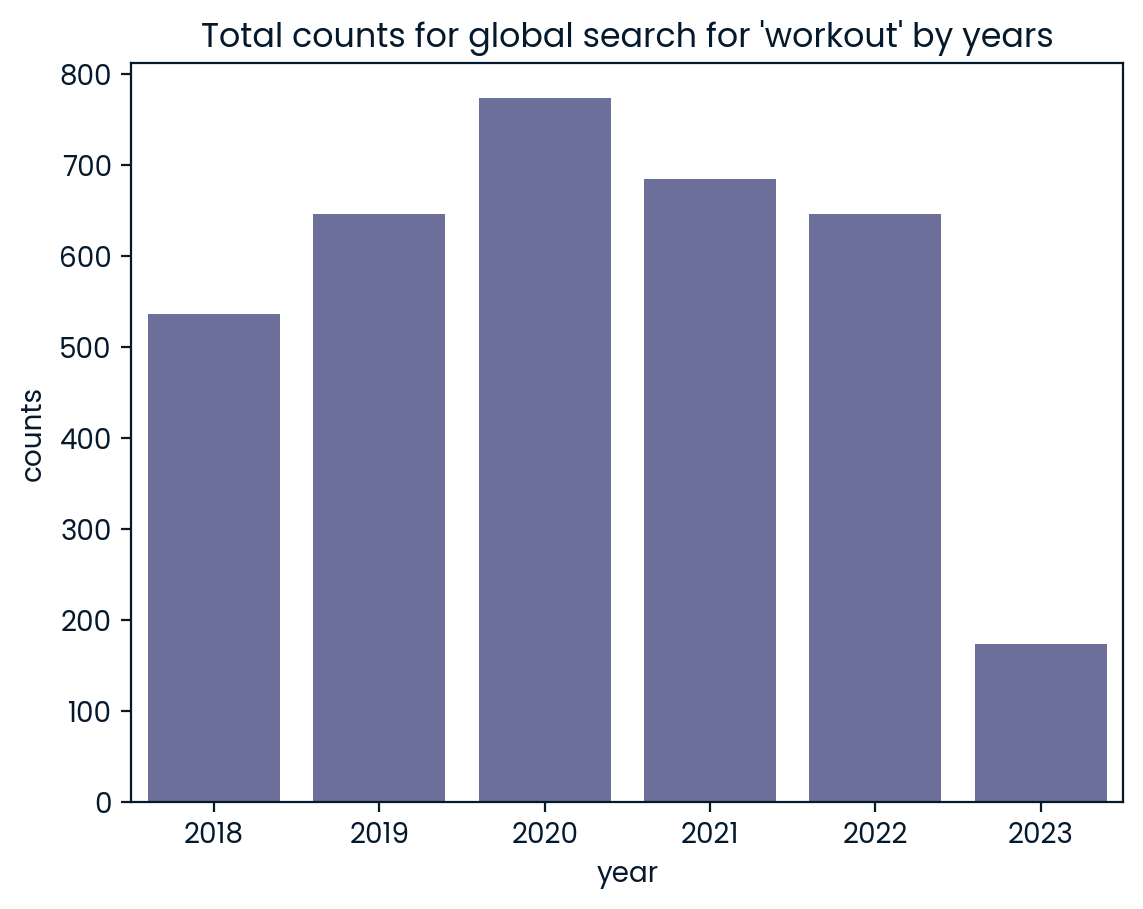

In [115]:
total_counts_by_year = df.groupby('year')['workout_worldwide'].sum().reset_index()
sns.barplot(x='year', y='workout_worldwide', data = total_counts_by_year)
plt.title("Total counts for global search for 'workout' by years")
plt.ylabel('counts')
plt.show()

In [116]:
df_keywords = pd.read_csv('data/three_keywords.csv')
df_keywords.head()

,month,home_workout_worldwide,gym_workout_worldwide,home_gym_worldwide
0,2018-03,12,16,10
1,2018-04,12,18,10
2,2018-05,13,16,9
3,2018-06,12,17,9
4,2018-07,12,17,9


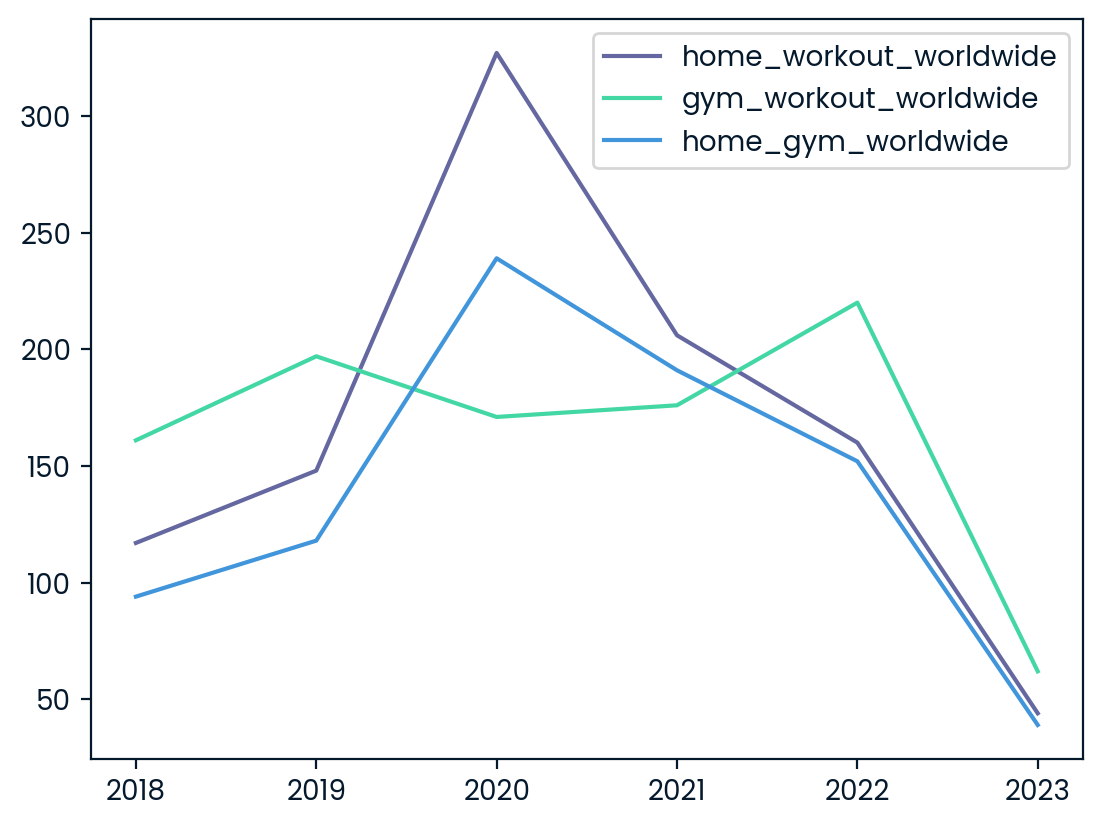

In [117]:
df_keywords['year'] = df_keywords['month'].str[:4]
total_keywords_by_years = df_keywords.groupby('year')[['home_workout_worldwide', 'gym_workout_worldwide','home_gym_worldwide']].sum().reset_index()
plt.plot('year','home_workout_worldwide', data = total_keywords_by_years)
plt.plot('year','gym_workout_worldwide', data = total_keywords_by_years)
plt.plot('year','home_gym_worldwide', data = total_keywords_by_years)
plt.legend()
plt.show()

In [118]:
peak_covid = "home workout"
current = 'gym workout'

In [119]:
df_country = pd.read_csv('data/workout_geo.csv')
four_countries = df_country[df_country['country'].isin(['United States', 'Australia', 'Japan'])]
top_country = four_countries.max()[0]

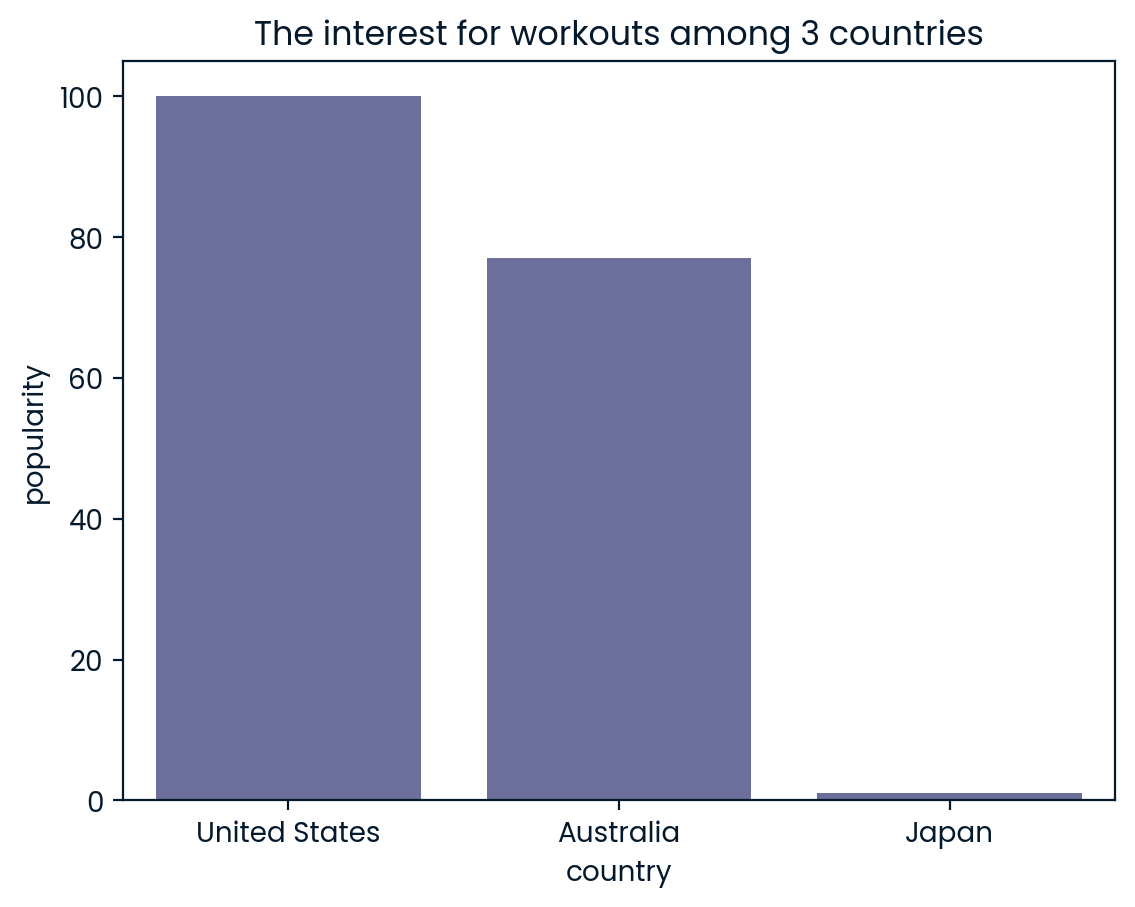

In [120]:
sns.barplot(x = 'country', y ='workout_2018_2023', data = four_countries)
plt.title('The interest for workouts among 3 countries')
plt.ylabel('popularity')
plt.show()

In [124]:
df_keywords_geo = pd.read_csv('data/three_keywords_geo.csv',index_col = 0)
target_countries = df_keywords_geo.loc[['Malaysia', 'Philippines']]
home_workout_geo = target_countries['home_workout_2018_2023'].idxmax()

# further exploration

In [141]:
cleaned_keywords_geo = df_keywords_geo.dropna(how='all')
cleaned_keywords_geo['home_workout_2018_2023'].idxmax()

'Iran'

# Insights
Iran is the country that has highest interested in home workout. If the company wants to gain more about the details like potential customer pool, may also have to dig more deeper on local gym data. 